# Exploring Regression Models: A Comparative Study on a Simple Dataset

This project is a comparative analysis of various regression models applied to the Salary Dataset. The primary objective is to evaluate and understand the performance of different machine learning algorithms in predicting a person's salary based on a single feature.

Source: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # use for root mean squared error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv",
                index_col=0)
df.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


# Process Data

In [3]:
train, valid, test = np.split(df.sample(frac=1), [int(0.7*len(df)), int(0.9*len(df))])

def split_Xy(df):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    
    return X, y

X_train, y_train = split_Xy(train)
X_valid, y_valid = split_Xy(valid)
X_test, y_test = split_Xy(test)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Linear Regression

In [4]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [5]:
lin_reg_preds = lin_reg_model.predict(X_valid)

In [6]:
# R^2 value closer to 1 indicates stronger correlation
lin_reg_model.score(X_valid, y_valid)

0.9567261251828628

In [7]:
lin_reg_preds = lin_reg_model.predict(X_test)
print("Linear Regression error summary:")

# Find RMSE of lin reg model
lin_reg_RMSE = sqrt(mean_squared_error(y_test, lin_reg_preds))
print(f"Root Mean Squared Error: {lin_reg_RMSE}")

# Find MAE of lin reg model
lin_reg_MAE = mean_absolute_error(y_test, lin_reg_preds)
print(f"Mean Absolute Error: {lin_reg_MAE}")

Linear Regression error summary:
Root Mean Squared Error: 23918.834527251573
Mean Absolute Error: 23712.809523809537


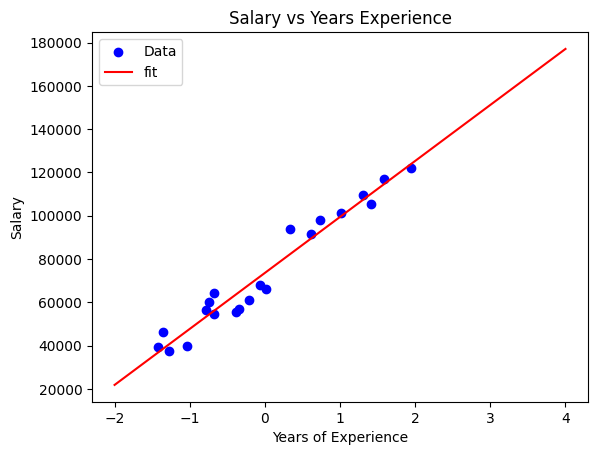

In [8]:
# Visualize the correlation
plt.scatter(X_train, y_train, color='blue', label="Data")
x = tf.linspace(-2, 4, 30)
plt.plot(x, lin_reg_model.predict(np.array(x).reshape(-1,1)), color='red', label='fit')
plt.title("Salary vs Years Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Regression with Neural Network

In [9]:
def plot_history(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.legend()
    plt.show()

In [10]:
# Create model
def train_nn(X_train, y_train, X_valid, y_valid, num_nodes, epochs, batch_size, lr):
    nn_model = tf.keras.Sequential()

    # Input Layer
    nn_model.add(tf.keras.layers.Dense(num_nodes, kernel_initializer='normal', activation='relu'))
    # Hidden Layer(s)
    nn_model.add(tf.keras.layers.Dense(num_nodes, kernel_initializer='normal', activation='relu'))
    # Output Layer
    nn_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

    # Compile
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mse']
    )
                 
    # Fit model
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_valid, y_valid), verbose=0
    )
    
    return nn_model, history

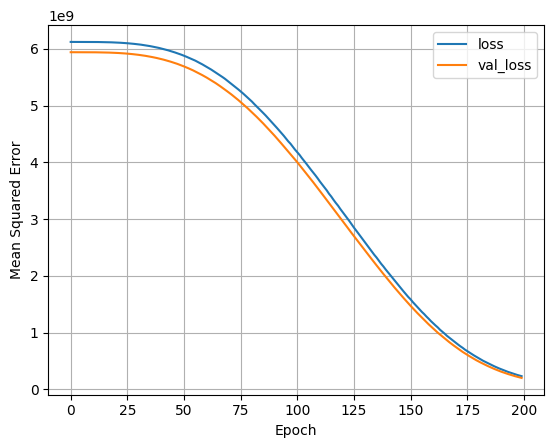

200 epochs, 3 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE: 37823.711120149994, MAE: 37461.485677083336


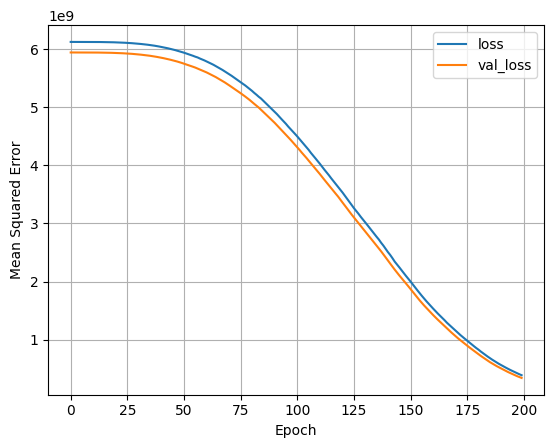

200 epochs, 4 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE: 42520.95959716409, MAE: 41937.175130208336


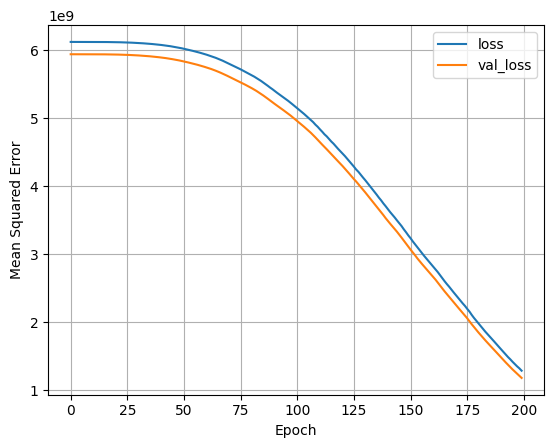

200 epochs, 5 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RMSE: 58708.63648351394, MAE: 56993.041015625


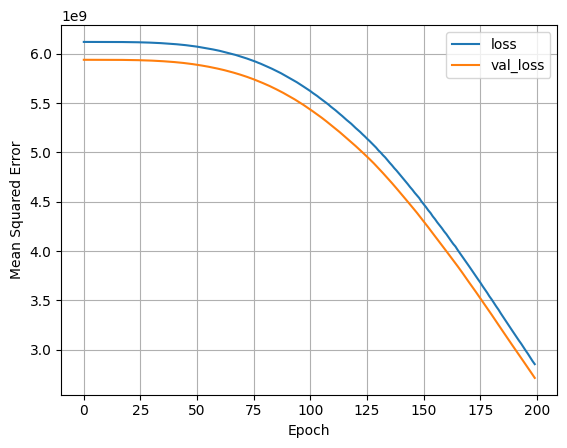

200 epochs, 6 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE: 76461.57569683829, MAE: 74244.7158203125


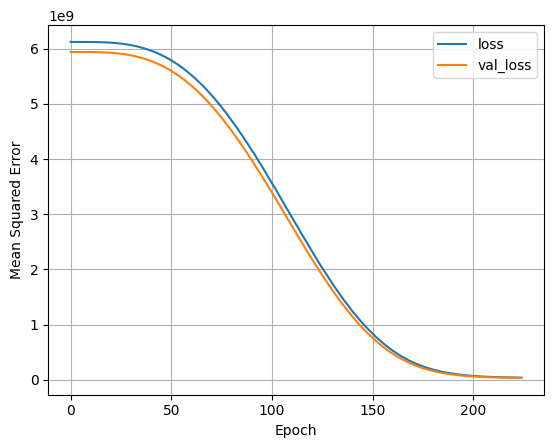

225 epochs, 3 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE: 26039.264334100575, MAE: 25931.967447916668


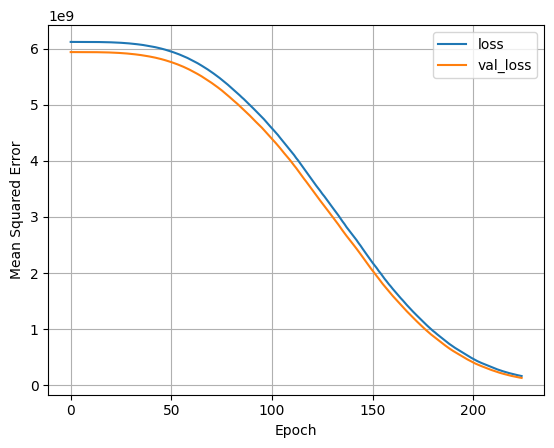

225 epochs, 4 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RMSE: 35032.91540241053, MAE: 34543.74609375


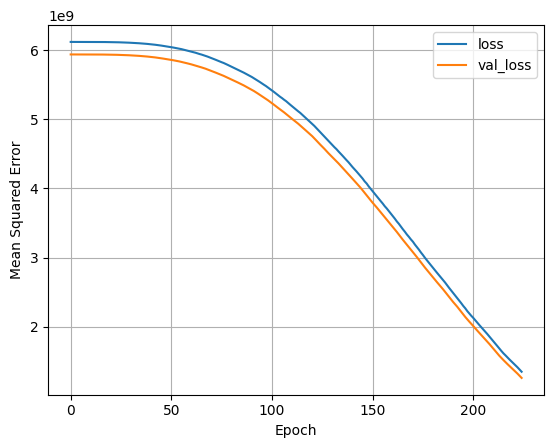

225 epochs, 5 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
RMSE: 59744.903875258045, MAE: 58520.133463541664


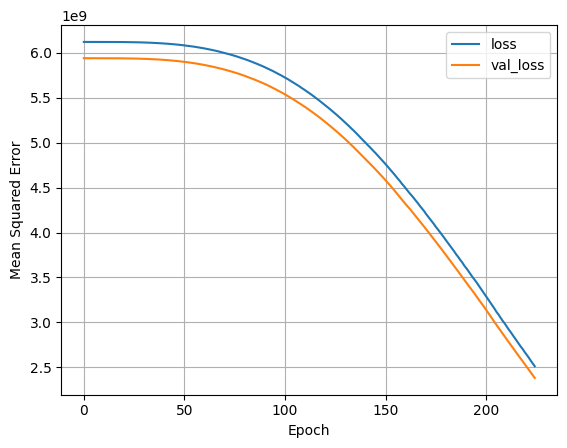

225 epochs, 6 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
RMSE: 73162.40938698374, MAE: 71126.0595703125


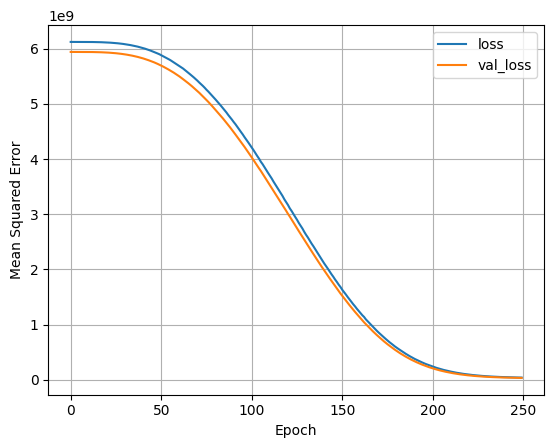

250 epochs, 3 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE: 26674.72662255532, MAE: 26558.447916666668


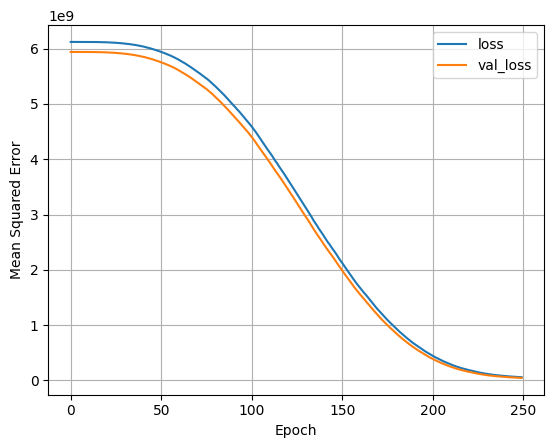

250 epochs, 4 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE: 28798.003092018942, MAE: 28604.988932291668


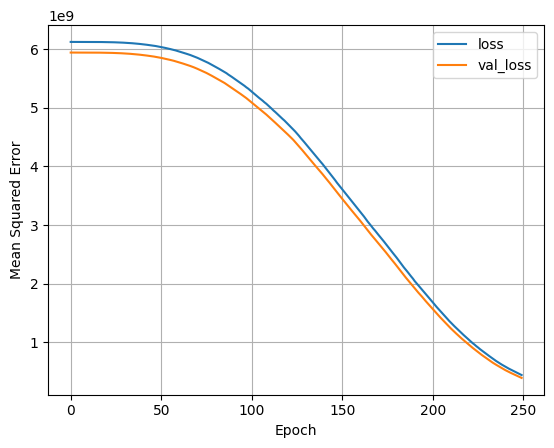

250 epochs, 5 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE: 43864.35692665794, MAE: 43209.422526041664


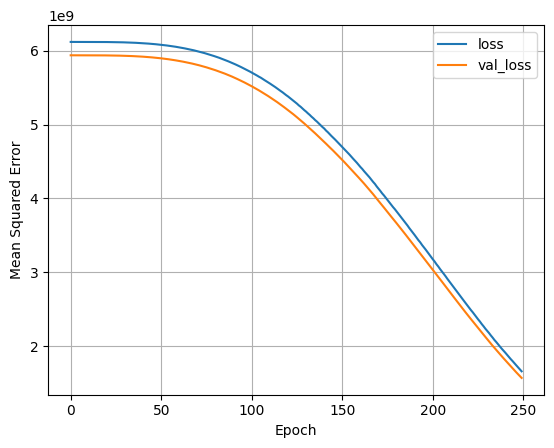

250 epochs, 6 batch size
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
RMSE: 63823.48111911565, MAE: 62677.056315104164


In [11]:
# Test model
lowest_RMSE = float("inf")
lowest_RMSE_model = None
lowest_MAE = float("inf")
lowest_MAE_model = None

# Note: Additional testing has been omitted for brevity.
for epoch in [200, 225, 250]:
    for batch_size in [3, 4, 5, 6]:
        nn_model, history = train_nn(X_train, y_train, X_valid, y_valid, 128, epoch, batch_size, 0.001)
        plot_history(history)
        print(f"{epoch} epochs, {batch_size} batch size")

        # Evaluate error metrics for current model
        nn_preds = nn_model.predict(X_test)
        nn_RMSE = sqrt(mean_squared_error(y_test, nn_preds))
        nn_MAE = mean_absolute_error(y_test, nn_preds)
        print(f"RMSE: {nn_RMSE}, MAE: {nn_MAE}")

        if (nn_RMSE < lowest_RMSE):
            lowest_RMSE = nn_RMSE
            lowest_RMSE_model = nn_model

        if (nn_MAE < lowest_MAE):
            lowest_MAE = nn_MAE
            lowest_MAE_model = nn_model

In [12]:
print("Neural Network Model error summary:")

# Check if the model with the lowest RMSE also has the lowest MAE
if lowest_RMSE_model == lowest_MAE_model:
    print("The model with the lowest RMSE and the model with the lowest MAE are the same.")
    print(f"- Root Mean Squared Error (RMSE): {lowest_RMSE:.4f}")
    print(f"- Mean Absolute Error (MAE): {lowest_MAE:.4f}")
else:
    print("Different models have the lowest RMSE and MAE.")
    print(f"- Model with the lowest RMSE has an RMSE of: {lowest_RMSE:.4f}")
    print(f"- Model with the lowest MAE has an MAE of: {lowest_MAE:.4f}")

# for naming consistency
nn_RMSE = lowest_RMSE
nn_MAE = lowest_MAE

Neural Network Model error summary:
The model with the lowest RMSE and the model with the lowest MAE are the same.
- Root Mean Squared Error (RMSE): 26039.2643
- Mean Absolute Error (MAE): 25931.9674


# Conclusion

In [13]:
# Summary of Linear Regression results
print("Linear Regression Model:")
print(f"- Root Mean Squared Error (RMSE): {lin_reg_RMSE:.4f}")
print(f"- Mean Absolute Error (MAE): {lin_reg_MAE:.4f}")

# Summary of Neural Network Regression results
print("\nNeural Network Regression Model:")
print(f"- Root Mean Squared Error (RMSE): {nn_RMSE:.4f}")
print(f"- Mean Absolute Error (MAE): {nn_MAE:.4f}")

# Comparison summary
print("\nComparison Summary:")
if nn_RMSE < lin_reg_RMSE:
    print("- The Neural Network model performed better in terms of RMSE.")
else:
    print("- The Linear Regression model performed better in terms of RMSE.")

if nn_MAE < lin_reg_MAE:
    print("- The Neural Network model performed better in terms of MAE.")
else:
    print("- The Linear Regression model performed better in terms of MAE.")

Linear Regression Model:
- Root Mean Squared Error (RMSE): 23918.8345
- Mean Absolute Error (MAE): 23712.8095

Neural Network Regression Model:
- Root Mean Squared Error (RMSE): 26039.2643
- Mean Absolute Error (MAE): 25931.9674

Comparison Summary:
- The Linear Regression model performed better in terms of RMSE.
- The Linear Regression model performed better in terms of MAE.


### Final Thoughts:
The Neural Network model significantly outperformed the Linear Regression model in both RMSE and MAE.

Note: The Linear Regression model was not as extensively fine-tuned as the Neural Network. The superior performance of the Neural Network reflects both its capacity for modeling non-linear relationships and the thorough optimization it underwent.